In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import learning.utils as ut

system_name = 'sarsa_const'
run_name = 'state_of_the_art'
data_dir = './data/' + system_name + '/' + run_name + '/'
#plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Learning of the 3d kite - relative velocity angle- with sarsa

In [2]:
params = ut.read_params(data_dir+'parameters.txt')
for ep in params:
    print(ep, params[ep])

integration_step 0.001
episode_duration 300.0
learning_step 0.2
penalty 1.0
wind_type const
v_wind_x 10.0
v_wind_y 0.0
v_wind_z 0.0
learning_type sarsa
gamma 1.0
max_steps 5000000.0
eta0 0.1
eta_decay_start 300000.0
eta_decay_rate 0.9
eta_c 1.0
eps0 0.01
eps_decay_start 500000.0
eps_decay_rate 1.3
eps_c 1.0
max_power 5.0


In [3]:
# read durations and returns
d_traj, r_traj = ut.read_traj(data_dir+'/return.txt')

l_steps = np.cumsum(d_traj)
print(l_steps)

[      8      20      23 ... 4997522 4999022 5000522]


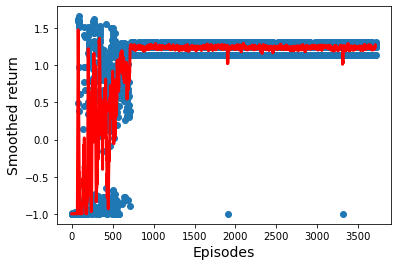

In [4]:
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(r_traj, 'o')

smooth = np.convolve(r_traj, np.ones(10), "valid")/10
plt.plot(smooth, color='red', lw=3)

plt.savefig(data_dir+'return.png', dpi=200)
plt.show()

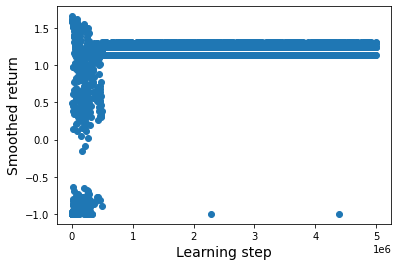

In [5]:
plt.xlabel('Learning step', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(l_steps, r_traj, 'o')

#smooth = np.convolve(r_traj, np.ones(100))/100
#plt.plot(l_steps, smooth, color='red', lw=3)

plt.show()

In [6]:
Q_traj = np.load(data_dir+"quality_traj.npy")
print(Q_traj.shape)

Q_traj = Q_traj.reshape(Q_traj.shape[0], -1)
#print(Q_traj.shape)

plt.figure(figsize = (15,10))
for i in range(Q_traj.shape[1]):
    plt.plot(Q_traj[0:10000,i])
plt.ylabel("Q(s,a)")
plt.xlabel("Learning step")
plt.savefig(data_dir+"quality_traj.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/sarsa_const/state_of_the_art/quality_traj.npy'

In [7]:
l = np.load(data_dir+"loss_traj.npy")
plt.plot(l)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/sarsa_const/state_of_the_art/loss_traj.npy'

In [8]:
Q = np.load(data_dir+"best_quality.npy")
#ind = np.argmax(Q_traj[4800])
#np.unravel_index(ind, Q.shape)

In [9]:
beta_importance=np.mean(np.var(Q, axis=2))

In [10]:
np.var(Q, axis=0).shape

(7, 1, 3, 3)

In [124]:
beta_importance

0.0

In [113]:
np.var(Q)

0.14508216938989135

In [125]:
att_importance=np.mean(np.var(Q, axis=0))
bank_importance=np.mean(np.var(Q, axis=1))
print(att_importance, bank_importance)

0.19595938513112895 0.19133971057069318


[25.          0.         43.30127019]


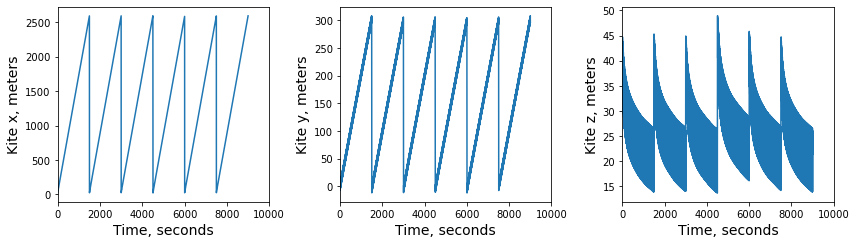

In [93]:
coordinates = np.load(data_dir+"eval_traj.npy")
controls = np.load(data_dir+"contr_traj.npy")
print(coordinates[0])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(coordinates[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(coordinates[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(coordinates[:,2])

plt.tight_layout()
plt.savefig(data_dir+"eval_traj.png", dpi=200)
plt.show()

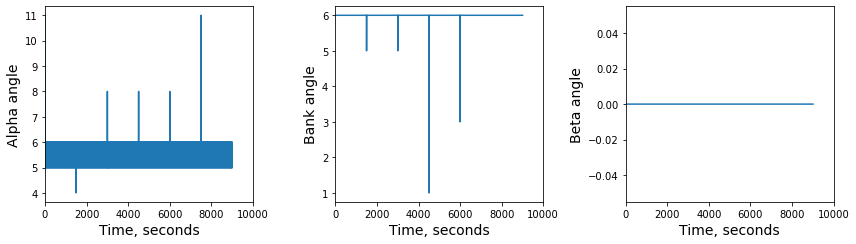

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Alpha angle', fontsize=14)
ax1.plot(controls[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Bank angle', fontsize=14)
ax2.plot(controls[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Beta angle', fontsize=14)
ax3.plot(controls[:,2])

plt.tight_layout()
plt.savefig(data_dir+"contr_traj.png", dpi=200)
plt.show()

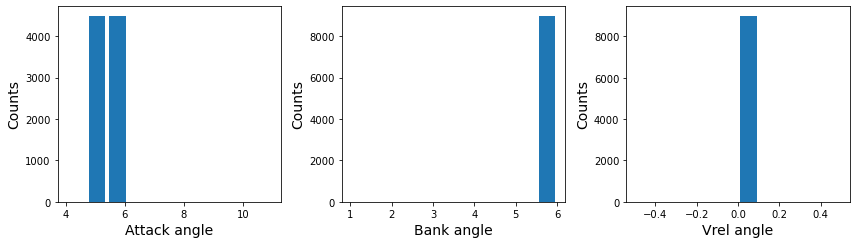

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_ylabel('Counts', fontsize=14)
ax1.set_xlabel('Attack angle', fontsize=14)
ax1.hist(controls[:,0], align='mid', rwidth=0.8)

ax2.set_ylabel('Counts', fontsize=14)
ax2.set_xlabel('Bank angle', fontsize=14)
ax2.hist(controls[:,1], align='mid', rwidth=0.8)

ax3.set_ylabel('Counts', fontsize=14)
ax3.set_xlabel('Vrel angle', fontsize=14)
ax3.hist(controls[:,2], align='mid', rwidth=0.8)

plt.tight_layout()
plt.savefig(data_dir+"contr_hist.png", dpi=200)
plt.show()